In [2]:
import boto3
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm

# Defining the s3 bucket
s3 = boto3.resource('s3')
bucket_name = 'gabriel-predictive-analytics'
bucket = s3.Bucket(bucket_name)

# Defining the file to be read from s3 bucket
file_key = "MarketingData.csv"

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

# Reading the csv file
marketing_data = pd.read_csv(file_content_stream)
marketing_data.head(1) 

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel
0,6623.613537,5513.09324,6019.057354,5669.568008,5898.660607,5179.234947,2


In [4]:
# Computing the number of observations in each of the marketing channels
marketing_data['Channel'].value_counts()

0    5007
3    5002
1    5001
2    4990
Name: Channel, dtype: int64

In [20]:
X = marketing_data['Channel'].value_counts()
X = pd.DataFrame(X, index = True)
X.head()

TypeError: Index(...) must be called with a collection of some kind, True was passed

<AxesSubplot:>

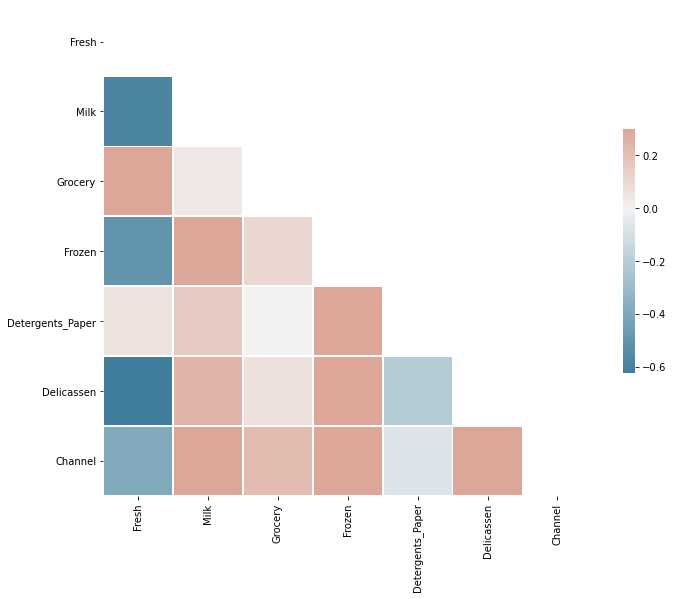

In [22]:
import seaborn as sns
# Compute the correlation matrix
corr = marketing_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [14]:
X = marketing_data['Channel'].value_counts()


channels = list(X.keys())
values = list(X.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(channels, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()

TypeError: 'numpy.ndarray' object is not callable

In [ ]:
X = marketing_data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].mean()
Y = marketing_data['Channel']

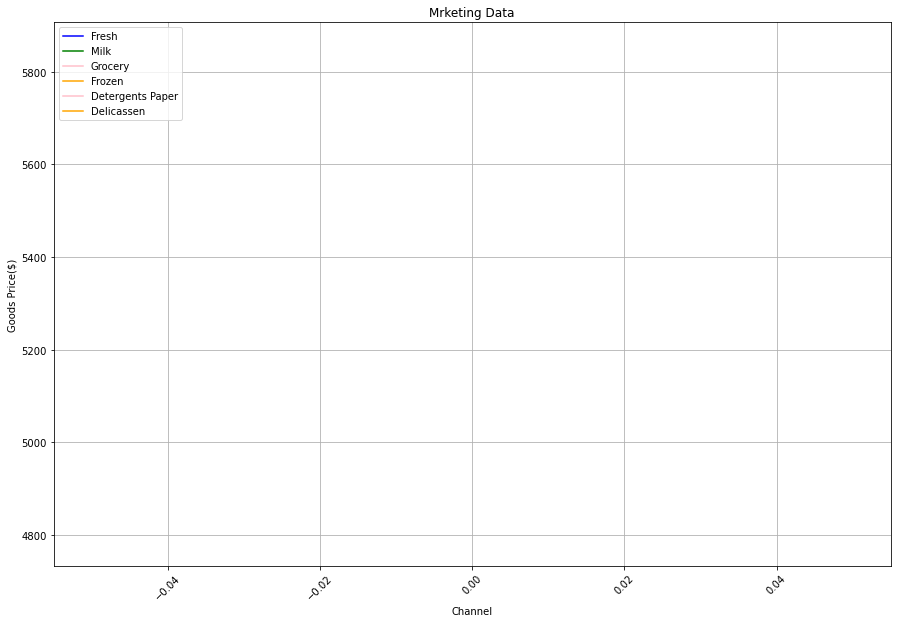

In [8]:
import matplotlib.pyplot as plt

channel_1 = marketing_data[marketing_data['Channel'] == 1]
plt.figure(figsize=(15, 10))
plt.plot(marketing_data['Fresh'].mean(), color = 'blue', label = 'Fresh')
plt.plot(marketing_data['Milk'].mean(), color = 'green', label = 'Milk')
plt.plot(marketing_data['Grocery'].mean(), color = 'pink', label = 'Grocery')
plt.plot(marketing_data['Frozen'].mean(), color = 'orange', label = 'Frozen')
plt.plot(marketing_data['Detergents_Paper'].mean(), color = 'pink', label = 'Detergents Paper')
plt.plot(marketing_data['Delicassen'].mean(), color = 'orange', label = 'Delicassen')
plt.title('Mrketing Data')
plt.ylabel('Goods Price($)')
plt.xlabel('Channel')
plt.legend(loc = 'upper left')
plt.xticks(rotation = 45)
plt.grid()